<a href="https://colab.research.google.com/github/yerrayyareddy/Indigo_Airline/blob/main/EDA_ON_INDIGO_AIRLINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import warnings
import math
warnings.filterwarnings("ignore")

In [150]:
df=pd.read_excel(r"data_airline_reviews_1.xlsx")

In [151]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
39995,Alitalia,9.0,D Cerulli,30th June 2014,Rome to Nice and return. We took off 10 mins e...,NaN,NaN,Economy Class,NaN,NaN,4.0,5.0,3.0,NaN,NaN,5.0,yes
39996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39997,Alitalia,NaN,N Yanaky,25th June 2014,My parents and I were returning from a lovely ...,NaN,NaN,Economy Class,NaN,NaN,1.0,3.0,1.0,1.0,NaN,3.0,no
39998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39999,Alitalia,NaN,Giovanni Rossi,20th June 2014,Linate - Trieste LIN-TRS. Now this flight is h...,NaN,NaN,Economy Class,NaN,NaN,1.0,3.0,2.0,NaN,NaN,2.0,no


In [153]:
df.shape

(40000, 17)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          20000 non-null  object 
 1   overall          19680 non-null  float64
 2   author           20000 non-null  object 
 3   review_date      20000 non-null  object 
 4   customer_review  20000 non-null  object 
 5   aircraft         6283 non-null   object 
 6   traveller_type   13311 non-null  object 
 7   cabin            19289 non-null  object 
 8   route            13301 non-null  object 
 9   date_flown       13280 non-null  object 
 10  seat_comfort     18857 non-null  float64
 11  cabin_service    18876 non-null  float64
 12  food_bev         16916 non-null  float64
 13  entertainment    14733 non-null  float64
 14  ground_service   13214 non-null  float64
 15  value_for_money  19429 non-null  float64
 16  recommended      19497 non-null  object 
dtypes: float64(7

In [155]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,19680.0,4.988211,3.512952,1.0,1.0,5.0,9.0,10.0
seat_comfort,18857.0,2.976826,1.436701,1.0,2.0,3.0,4.0,5.0
cabin_service,18876.0,3.167355,1.569719,1.0,2.0,3.0,5.0,5.0
food_bev,16916.0,2.971743,1.483867,1.0,1.0,3.0,4.0,5.0
entertainment,14733.0,3.061562,1.522952,1.0,1.0,3.0,4.0,5.0
ground_service,13214.0,2.630922,1.611870,1.0,1.0,2.0,4.0,5.0
value_for_money,19429.0,2.883216,1.582083,1.0,1.0,3.0,4.0,5.0


In [156]:
df.duplicated().sum()

np.int64(20189)

In [157]:
df.drop_duplicates(inplace=True)

In [158]:
df.shape

(19811, 17)

In [159]:
df.isnull().sum()

,0
airline,1
overall,315
author,1
review_date,1
customer_review,1
aircraft,13528
traveller_type,6501
cabin,707
route,6511
date_flown,6532


In [160]:
df.isnull().sum()/df.shape[0]*100

,0
airline,0.005048
overall,1.590026
author,0.005048
review_date,0.005048
customer_review,0.005048
aircraft,68.285296
traveller_type,32.815103
cabin,3.568724
route,32.865580
date_flown,32.971581


In [161]:
def drop_null(df):
  null_percentage = df.isnull().sum()/df.shape[0]*100
  columns_to_drop = [col for col in df.columns if null_percentage[col]>25.00]
  df.drop(columns=columns_to_drop, inplace=True)

  return df

In [162]:
drop_null(df)

,airline,overall,author,review_date,customer_review,cabin,seat_comfort,cabin_service,food_bev,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Economy Class,4.0,5.0,4.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Economy Class,4.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Economy Class,1.0,4.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,Economy Class,4.0,5.0,5.0,5.0,yes
...,...,...,...,...,...,...,...,...,...,...,...
39991,Alitalia,7.0,T Matava,6th July 2014,AZ703 IST-FCO connecting onto AZ 630 FCO-MIA B...,NaN,NaN,NaN,NaN,NaN,NaN
39993,Alitalia,10.0,S Kesavan,30th June 2014,Flew from Rome to Lamezia Terme and back. A mo...,Economy Class,4.0,5.0,5.0,5.0,yes
39995,Alitalia,9.0,D Cerulli,30th June 2014,Rome to Nice and return. We took off 10 mins e...,Economy Class,4.0,5.0,3.0,5.0,yes
39997,Alitalia,NaN,N Yanaky,25th June 2014,My parents and I were returning from a lovely ...,Economy Class,1.0,3.0,1.0,3.0,no


In [163]:
df.isnull().sum()/df.shape[0]*100

,0
airline,0.005048
overall,1.590026
author,0.005048
review_date,0.005048
customer_review,0.005048
cabin,3.568724
seat_comfort,5.759427
cabin_service,5.668568
food_bev,15.546918
value_for_money,2.872142


In [164]:
df.dropna(axis=1,how='all',inplace=True)

In [165]:
df.dropna(axis=0,how='all',inplace=True)

In [166]:
df.shape

(19810, 11)

In [167]:
type(df)

pandas.core.frame.DataFrame

In [168]:
list(df.columns)

['airline',
 'overall',
 'author',
 'review_date',
 'customer_review',
 'cabin',
 'seat_comfort',
 'cabin_service',
 'food_bev',
 'value_for_money',
 'recommended']

In [169]:
df.dtypes

,0
airline,object
overall,float64
author,object
review_date,object
customer_review,object
cabin,object
seat_comfort,float64
cabin_service,float64
food_bev,float64
value_for_money,float64


In [170]:
df.head(1)

,airline,overall,author,review_date,customer_review,cabin,seat_comfort,cabin_service,food_bev,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Economy Class,4.0,5.0,4.0,4.0,yes


In [171]:
df['review_date']=pd.to_datetime(df['review_date'],errors='coerce')

In [172]:
df.dtypes

,0
airline,object
overall,float64
author,object
review_date,datetime64[ns]
customer_review,object
cabin,object
seat_comfort,float64
cabin_service,float64
food_bev,float64
value_for_money,float64


In [173]:
! pip install textblob

In [174]:
from textblob import TextBlob
def get_sentiment(text):
  return TextBlob(text).sentiment.polarity

df['sentiment_score']=df['customer_review'].apply(get_sentiment)
print("Sentiment analysis applied. Sentiment score added to dataset.")

Sentiment analysis applied. Sentiment score added to dataset.


In [175]:
df.head(2)

,airline,overall,author,review_date,customer_review,cabin,seat_comfort,cabin_service,food_bev,value_for_money,recommended,sentiment_score
1,Turkish Airlines,7.0,Christopher Hackley,2019-05-08,âœ… Trip Verified | London to Izmir via Istanb...,Economy Class,4.0,5.0,4.0,4.0,yes,0.260263
3,Turkish Airlines,2.0,Adriana Pisoi,2019-05-07,âœ… Trip Verified | Istanbul to Bucharest. We ...,Economy Class,4.0,1.0,1.0,1.0,no,0.116667


In [176]:
df.drop(columns=['customer_review'],inplace=True)

In [177]:
df.drop(columns=['author',"review_date"],inplace=True)

In [178]:
df["airline"].value_counts()

,count
airline,
American Airlines,2846
United Airlines,2774
Emirates,1763
Delta Air Lines,1535
Turkish Airlines,1478
Qatar Airways,1430
Lufthansa,1401
Air Canada,1272
KLM Royal Dutch Airlines,969


In [179]:
df["cabin"].value_counts()

,count
cabin,
Economy Class,14352
Business Class,3141
Premium Economy,853
First Class,758


In [180]:
df.head()

,airline,overall,cabin,seat_comfort,cabin_service,food_bev,value_for_money,recommended,sentiment_score
1,Turkish Airlines,7.0,Economy Class,4.0,5.0,4.0,4.0,yes,0.260263
3,Turkish Airlines,2.0,Economy Class,4.0,1.0,1.0,1.0,no,0.116667
5,Turkish Airlines,3.0,Economy Class,1.0,4.0,1.0,2.0,no,0.019803
7,Turkish Airlines,10.0,Economy Class,4.0,5.0,5.0,5.0,yes,0.345238
9,Turkish Airlines,1.0,Economy Class,1.0,1.0,1.0,1.0,no,0.191667


In [181]:
df.isnull().sum()

,0
airline,0
overall,314
cabin,706
seat_comfort,1140
cabin_service,1122
food_bev,3079
value_for_money,568
recommended,501
sentiment_score,0


In [182]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
airline,19810,17,American Airlines,2846,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall,19496.0,NaN,NaN,NaN,4.986561,3.513638,1.0,1.0,5.0,9.0,10.0
cabin,19104,4,Economy Class,14352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seat_comfort,18670.0,NaN,NaN,NaN,2.975201,1.437272,1.0,2.0,3.0,4.0,5.0
cabin_service,18688.0,NaN,NaN,NaN,3.166738,1.569674,1.0,2.0,3.0,5.0,5.0
food_bev,16731.0,NaN,NaN,NaN,2.972088,1.484246,1.0,1.0,3.0,4.0,5.0
value_for_money,19242.0,NaN,NaN,NaN,2.881561,1.58348,1.0,1.0,3.0,4.0,5.0
recommended,19309,2,no,10470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sentiment_score,19810.0,NaN,NaN,NaN,0.110325,0.207027,-1.0,-0.020186,0.1,0.243927,1.0


In [183]:
df['overall'].fillna(df['overall'].mean(),inplace=True)
df['cabin'].fillna(df['cabin'].mode()[0],inplace=True)
df['seat_comfort'].fillna(df['seat_comfort'].mean(),inplace=True)
df['cabin_service'].fillna(df['cabin_service'].mean(),inplace=True)
df['food_bev'].fillna(df['food_bev'].mean(),inplace=True)
df['value_for_money'].fillna(df['value_for_money'].mean(),inplace=True)
df['recommended'].fillna(df['recommended'].mode()[0],inplace=True)

In [184]:
df.isnull().sum()

,0
airline,0
overall,0
cabin,0
seat_comfort,0
cabin_service,0
food_bev,0
value_for_money,0
recommended,0
sentiment_score,0


In [185]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 6 numerical features : ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'value_for_money', 'sentiment_score']

We have 3 categorical features : ['airline', 'cabin', 'recommended']


In [186]:
for col in categorical_features:
  print(df[col].value_counts(normalize=True)*100)
  print('--------------------------------------')

airline
American Airlines            14.366482
United Airlines              14.003029
Emirates                      8.899546
Delta Air Lines               7.748612
Turkish Airlines              7.460878
Qatar Airways                 7.218576
Lufthansa                     7.072186
Air Canada                    6.420999
KLM Royal Dutch Airlines      4.891469
Southwest Airlines            4.588592
Jetblue Airways               3.240787
Air New Zealand               3.069157
Aegean Airlines               2.675416
Aeroflot Russian Airlines     2.529026
Aeromexico                    2.205957
Alitalia                      2.044422
Virgin America                1.564866
Name: proportion, dtype: float64
--------------------------------------
cabin
Economy Class      76.012115
Business Class     15.855628
Premium Economy     4.305906
First Class         3.826350
Name: proportion, dtype: float64
--------------------------------------
recommended
no     55.381121
yes    44.618879
Name: proportion,

Numerical Features


In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

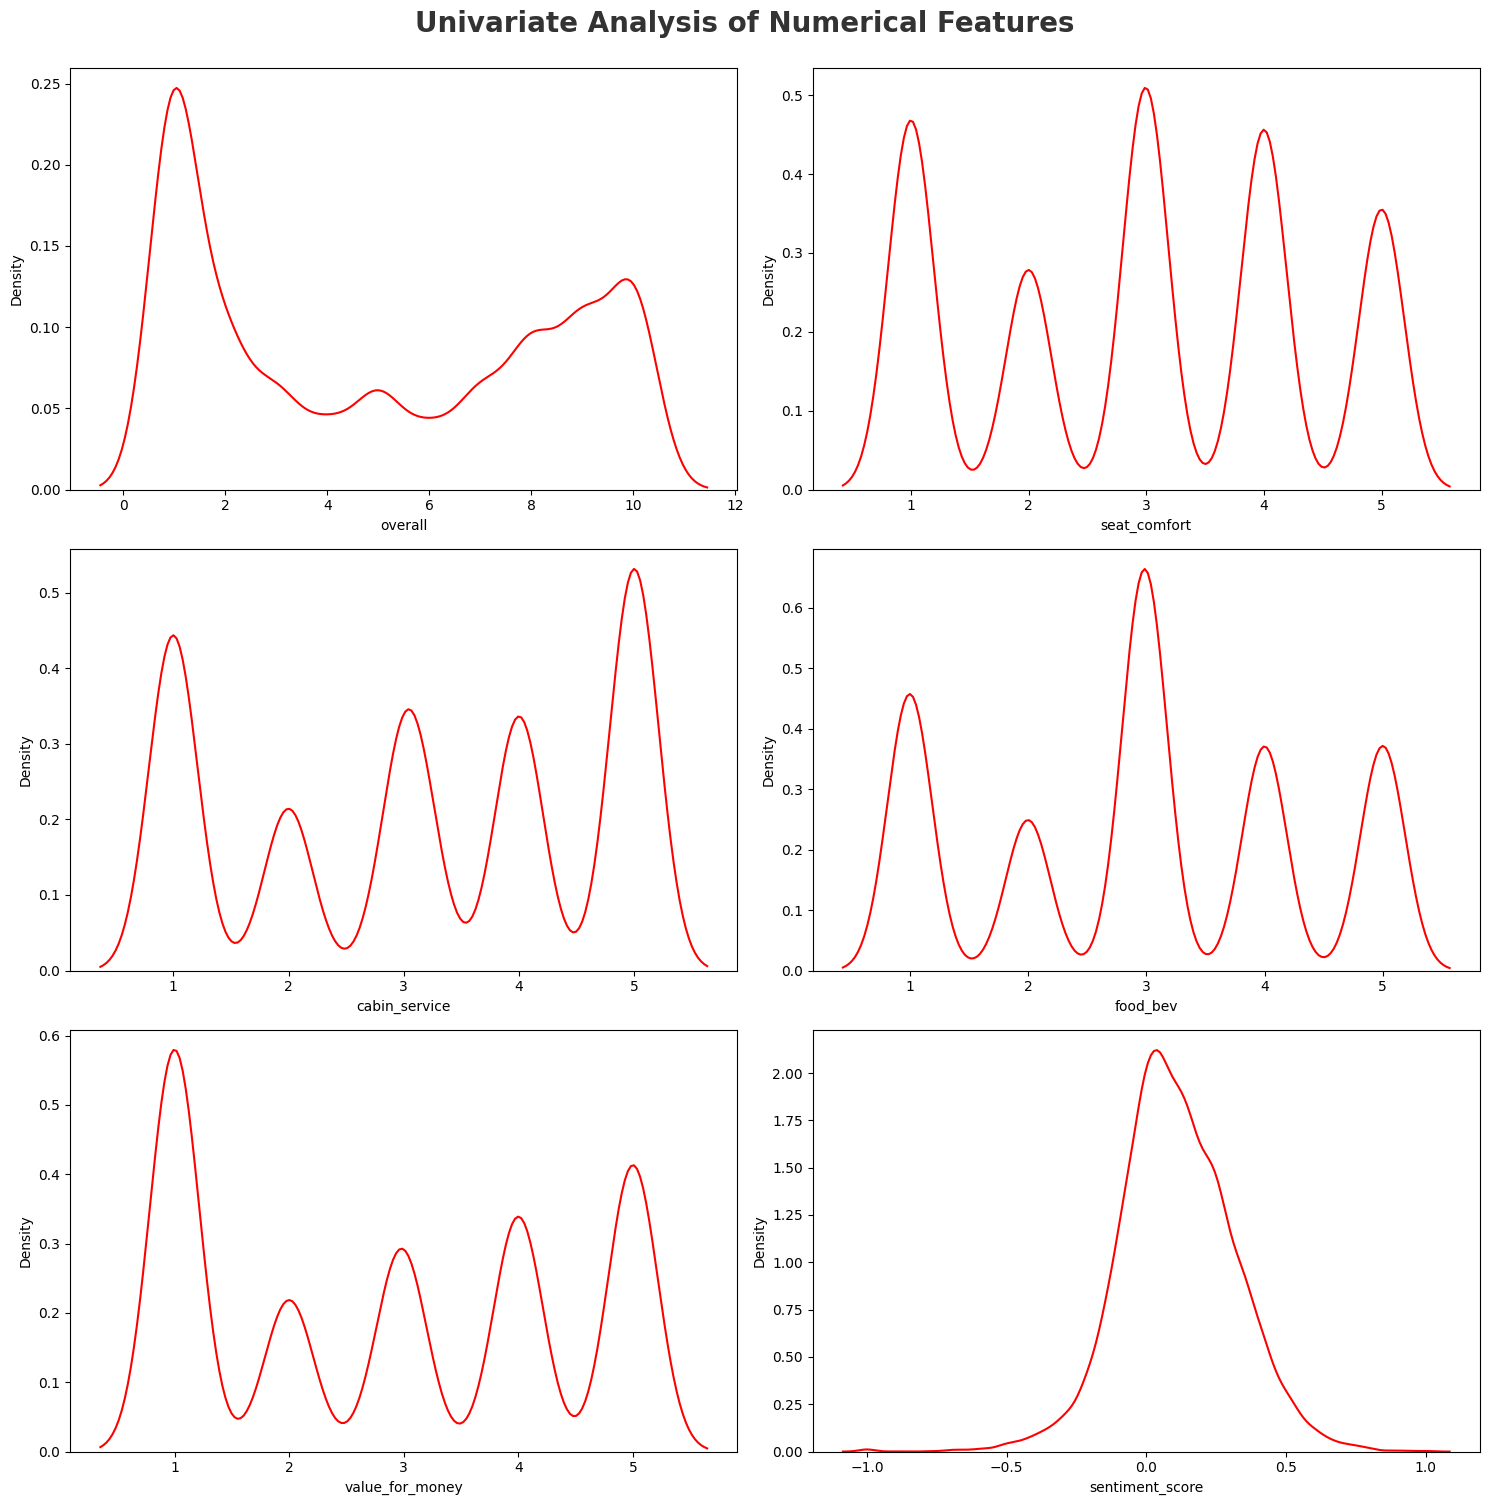

In [188]:
n_features =len(numeric_features)
n_cols =2
n_rows = int(np.ceil(n_features/n_cols))

#Create the plot
plt.figure(figsize=(15,5*n_rows))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)

#Loop to create subplots for each numberical feature
for i in range(n_features):
  plt.subplot(n_rows,n_cols,i+1)
  sns.kdeplot(x=df[numeric_features[i]],color='red')
  plt.xlabel(numeric_features[i])
plt.tight_layout()
plt.show()

Categorical Features

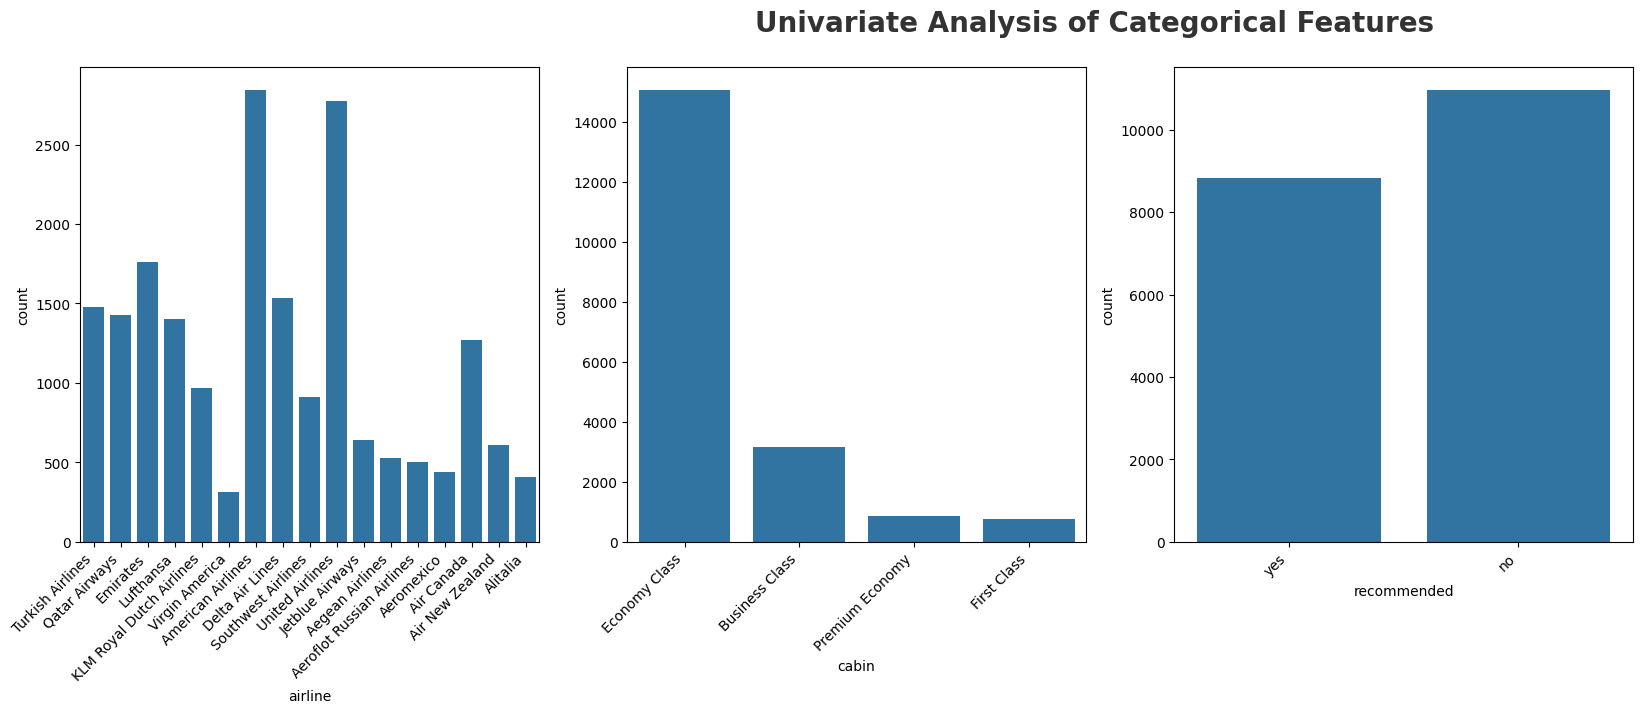

In [189]:
plt.figure(figsize=(22,25))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20,fontweight='bold',alpha=.8,y=1)

for i in range(0, len(categorical_features)):
  plt.subplot(4,4,i+1)
  sns.countplot(x=df[categorical_features[i]])
  plt.xlabel(categorical_features[i])
  plt.xticks(rotation=45,ha='right')
  plt.tight_layout()

In [190]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]
continous_features=[feature for feature in numeric_features if len(df[feature].unique())>25]

print('We have {} discrete features : {}'.format(len(discrete_features),discrete_features))
print('\nWe have {} continous features : {}'.format(len(continous_features),continous_features))

We have 5 discrete features : ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'value_for_money']

We have 1 continous features : ['sentiment_score']


Check Multicollinearity for Categorical features

In [191]:
from scipy.stats import chi2_contingency
chi2_test =[]
for feature in categorical_features:
  if chi2_contingency(pd.crosstab(df['recommended'],df[feature]))[1]<0.05:
    chi2_test.append('Reject the Null Hypothesis')
  else:
    chi2_test.append('Fail to Reject the Null Hypothesis')
result = pd.DataFrame(data=[categorical_features,chi2_test]).T
result.columns = ['Columns','Hypothesis Result']
result

,Columns,Hypothesis Result
0,airline,Reject the Null Hypothesis
1,cabin,Reject the Null Hypothesis
2,recommended,Reject the Null Hypothesis


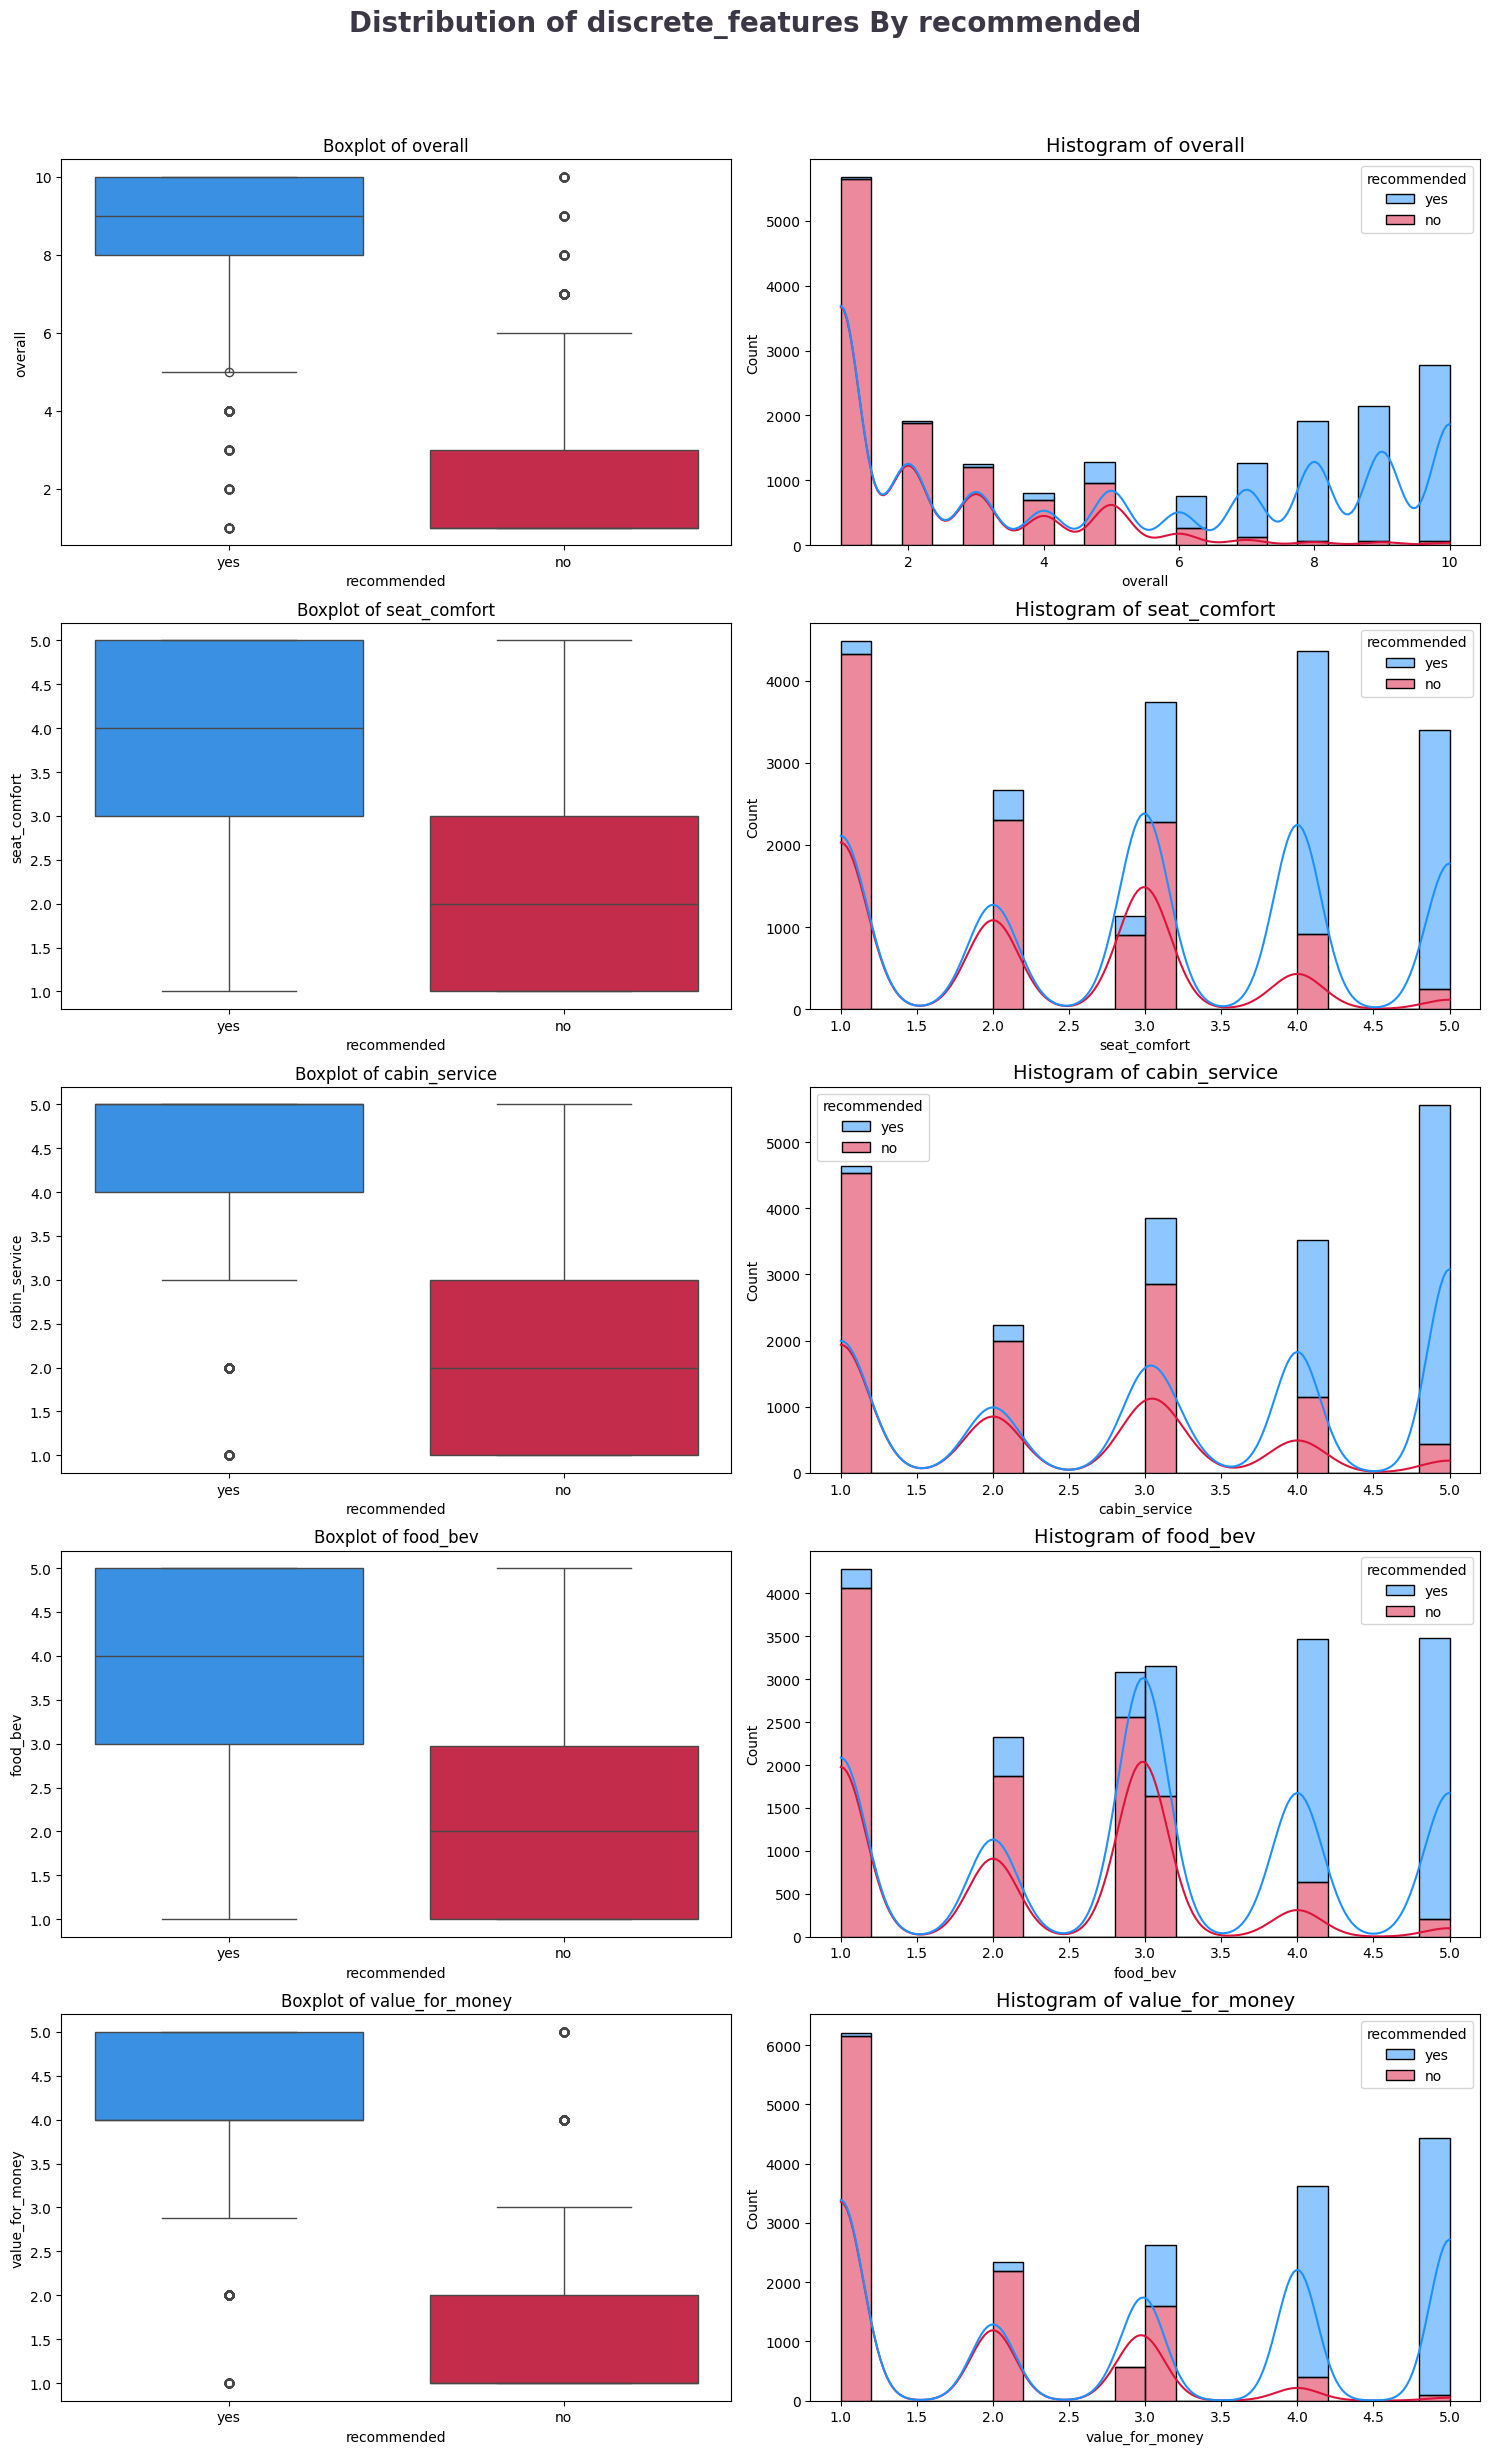

In [192]:
clr1=['#1E90FF','#DC143C']
num_rows =5
num_cols=math.ceil(len(discrete_features)/num_rows)

fig_width=15
fig_height=5*num_rows

fig,ax=plt.subplots(num_rows,2,figsize=(fig_width,fig_height))
fig.suptitle('Distribution of discrete_features By recommended',color='#3C3744',fontsize=20,fontweight='bold',ha='center')

for i, col in enumerate(discrete_features):
  if i< num_rows*2:
    row_index =i%num_rows
    col_index =i// num_rows

    sns.boxplot(data=df,x='recommended',y=col,palette=clr1,ax=ax[row_index,0])
    ax[row_index,0].set_title(f'Boxplot of {col}',fontsize=12)

    sns.histplot(data=df,x=col,hue='recommended',bins=20,kde=True,multiple='stack',palette=clr1,ax=ax[row_index,1])
    ax[row_index,1].set_title(f'Histogram of {col}',fontsize=14)
  else:
    break

for i in range(len(discrete_features),num_rows*2):
  ax[i//2,i%2].axis('on')

fig.tight_layout()
fig.subplots_adjust(top=0.92)


In [193]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features:',continues_features)

Num of continues features: ['overall', 'sentiment_score']


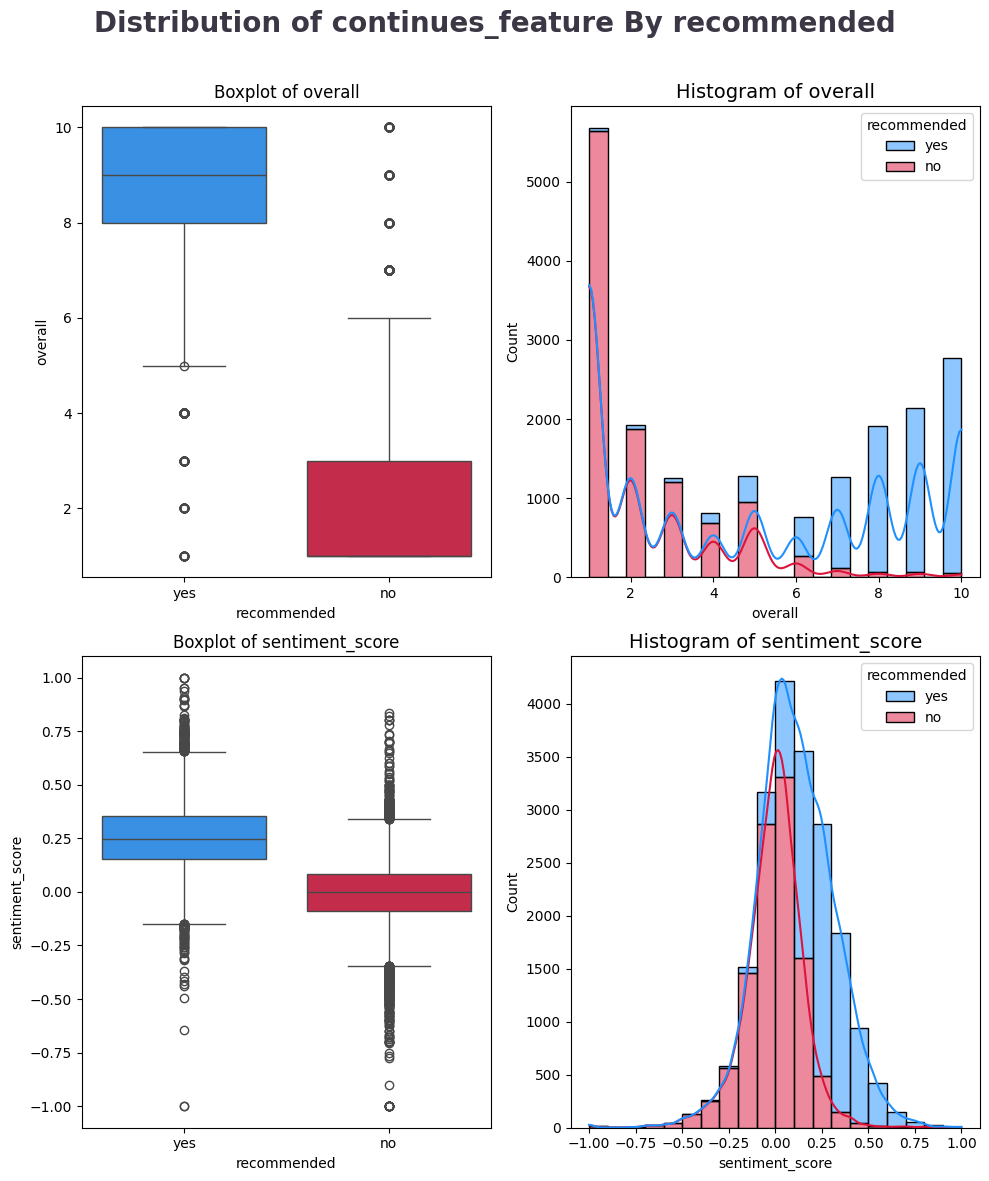

In [194]:
clr1=['#1E90FF','#DC143C']
num_rows =2
#num_cols=math.ceil(len(discrete_features)/num_rows)

#fig_width=15
#fig_height=5*num_rows

fig,ax=plt.subplots(num_rows,2,figsize=(10,12))
fig.suptitle('Distribution of continues_feature By recommended',color='#3C3744',fontsize=20,fontweight='bold',ha='center')

for i, col in enumerate(continues_features):
  #if i< num_rows*2:
   # row_index =i%num_rows
    #col_index =i// num_rows

    sns.boxplot(data=df,x='recommended',y=col,palette=clr1,ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}',fontsize=12)

    sns.histplot(data=df,x=col,hue='recommended',bins=20,kde=True,multiple='stack',palette=clr1,ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}',fontsize=14)
  #else:
   # break

#for i in range(len(discrete_features),num_rows*2):
 # ax[i//2,i%2].axis('on')

fig.tight_layout()
fig.subplots_adjust(top=0.90)



Visualize the Target Feature

In [195]:
df.recommended.value_counts()

,count
recommended,
no,10971
yes,8839


In [196]:
df.recommended.value_counts(normalize=True)*100

,proportion
recommended,
no,55.381121
yes,44.618879


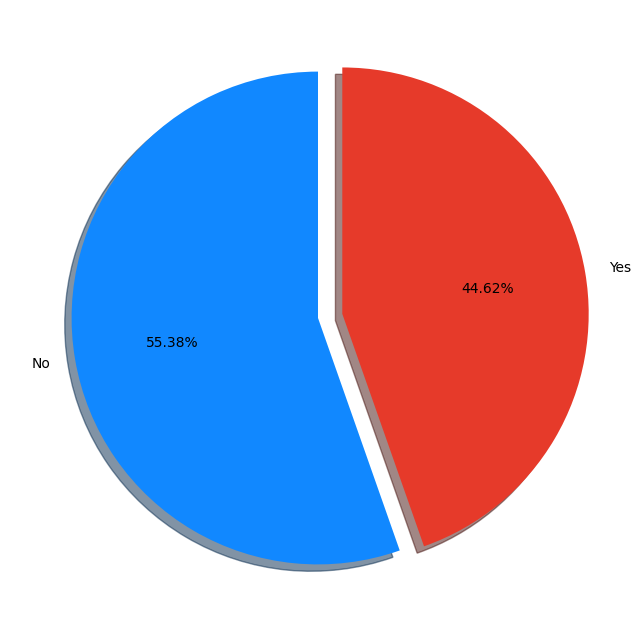

In [197]:
percentage =df.recommended.value_counts(normalize=True)*100
labels=["No","Yes"]
fig, ax =plt.subplots(figsize=(15,8))
explode=(0,0.1)
colors=['#1188ff','#e63a2a']
ax.pie(percentage,labels=labels,startangle=90,autopct='%1.2f%%',explode=explode,shadow=True,colors=colors)
plt.show()

4.2 Does airline has any impact on recommended?

In [198]:
df.groupby('airline')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
airline                   recommended            
Aegean Airlines           yes           78.679245
                          no            21.320755
Aeroflot Russian Airlines yes           62.674651
                          no            37.325349
Aeromexico                no            60.411899
                          yes           39.588101
Air Canada                no            61.792453
                          yes           38.207547
Air New Zealand           yes           54.440789
                          no            45.559211
Alitalia                  no            60.987654
                          yes           39.012346
American Airlines         no            80.604357
                          yes           19.395643
Delta Air Lines           no            61.042345
                          yes           38.957655
Emirates                  yes           53.545094
                          no            46.454906
Jetblue Airways           no            58.566978
                          yes           41.433022
KLM Royal Dutch Airlines  yes           63.880289
                          no            36.119711
Lufthansa                 yes           70.021413
                          no            29.978587
Qatar Airways             yes           76.993007
                          no            23.006993
Southwest Airlines        no            55.555556
                          yes           44.444444
Turkish Airlines          no            50.879567
                          yes           49.120433
United Airlines           no            79.055516
                          yes           20.944484
Virgin America            yes           60.645161
                          no            39.354839

In [199]:
df2=df.copy()

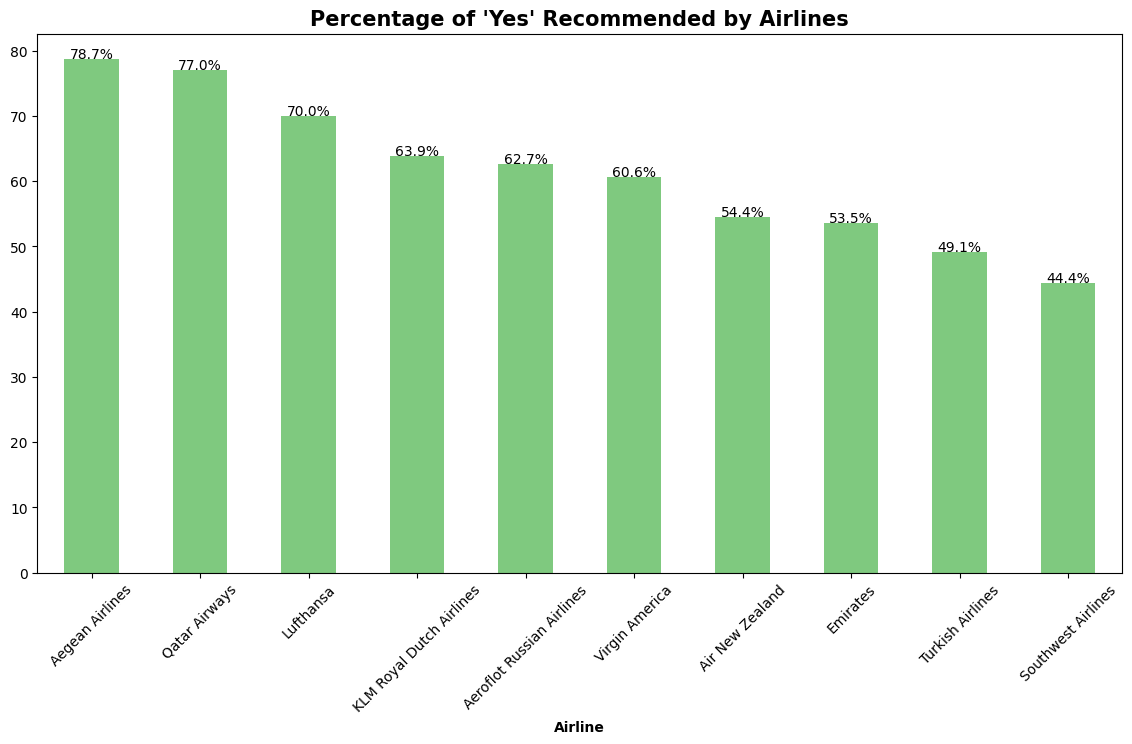

In [200]:
plt.figure(figsize=[14,7])

order1=100*df2[df2["recommended"]=='yes']['airline'].value_counts()/df2["airline"].value_counts()
order1_sorted=order1.sort_values(ascending=False).head(10)

order1_sorted.plot(kind='bar',stacked=True,colormap='Accent')
plt.title("Percentage of 'Yes' Recommended by Airlines",fontsize=15, fontweight='bold')

for n in range(order1_sorted.shape[0]):
  count =order1_sorted.iloc[n]
  strt='{:0.1f}%'.format(count)
  plt.text(n,count+0.1,strt,ha='center')
plt.xlabel("Airline",fontweight='bold')
plt.xticks(rotation=45)
plt.show()

the airline value variable where has high impact

Does overall has any impact on recommended?


In [201]:
df.groupby('overall')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
overall   recommended            
1.000000  no            99.471086
          yes            0.528914
2.000000  no            97.864583
          yes            2.135417
3.000000  no            96.181384
          yes            3.818616
4.000000  no            85.326757
          yes           14.673243
4.986561  no            99.681529
          yes            0.318471
5.000000  no            66.459627
          yes           33.540373
6.000000  yes           64.435696
          no            35.564304
7.000000  yes           90.266876
          no             9.733124
8.000000  yes           96.234310
          no             3.765690
9.000000  yes           96.736597
          no             3.263403
10.000000 yes           97.947425
          no             2.052575

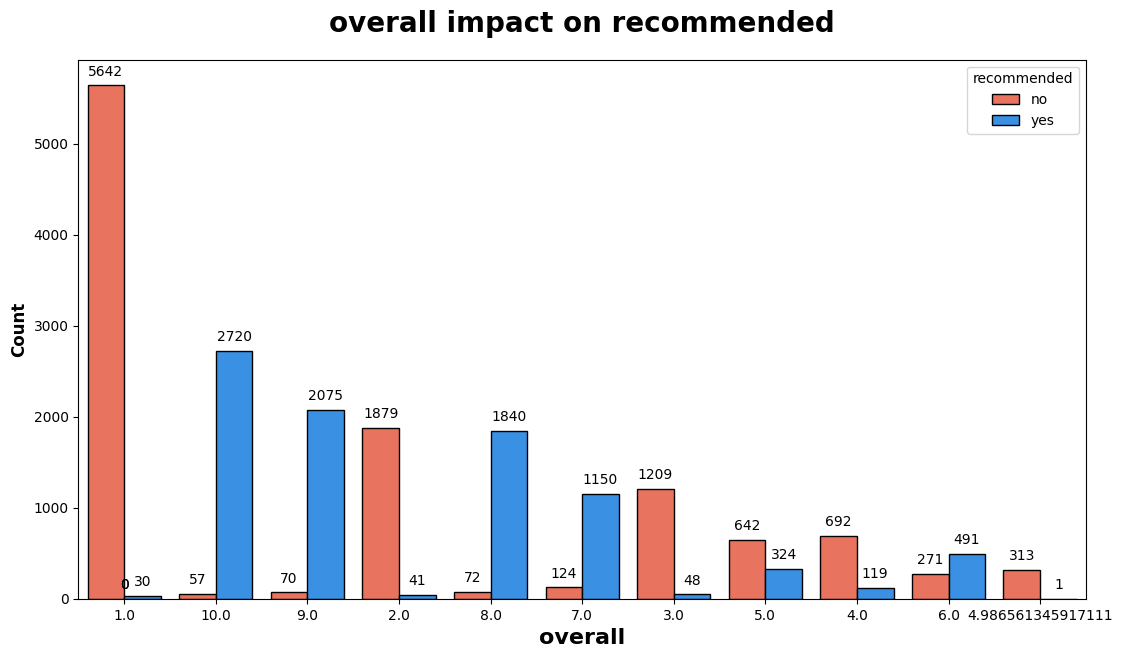

In [202]:
custom_palette =['#FF6347','#1E90FF'] #100# Example colors for yes" and "no"

overall_order =df ['overall'].value_counts().sort_values(ascending=False).index

plt.subplots(figsize=(13, 7))

ax = sns.countplot(x='overall', hue="recommended", data=df, ec="black", palette=custom_palette,order=overall_order)

plt.title("overall impact on recommended", weight="bold", fontsize=20, pad=20)

plt.ylabel( "Count", weight="bold", fontsize=12)

plt.xlabel("overall", weight ="bold", fontsize=16)

plt.legend(title="recommended", fancybox= True)



for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'),
              (p.get_x()+ p.get_width() / 2., p.get_height()),
              ha='center', va='center',
              xytext=(0, 10),
              textcoords ='offset points')
plt.show()

Does cabin has impact on recommended

In [203]:
df.groupby('cabin')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
cabin           recommended            
Business Class  yes           66.698504
                no            33.301496
Economy Class   no            60.638863
                yes           39.361137
First Class     yes           54.749340
                no            45.250660
Premium Economy no            52.872216
                yes           47.127784

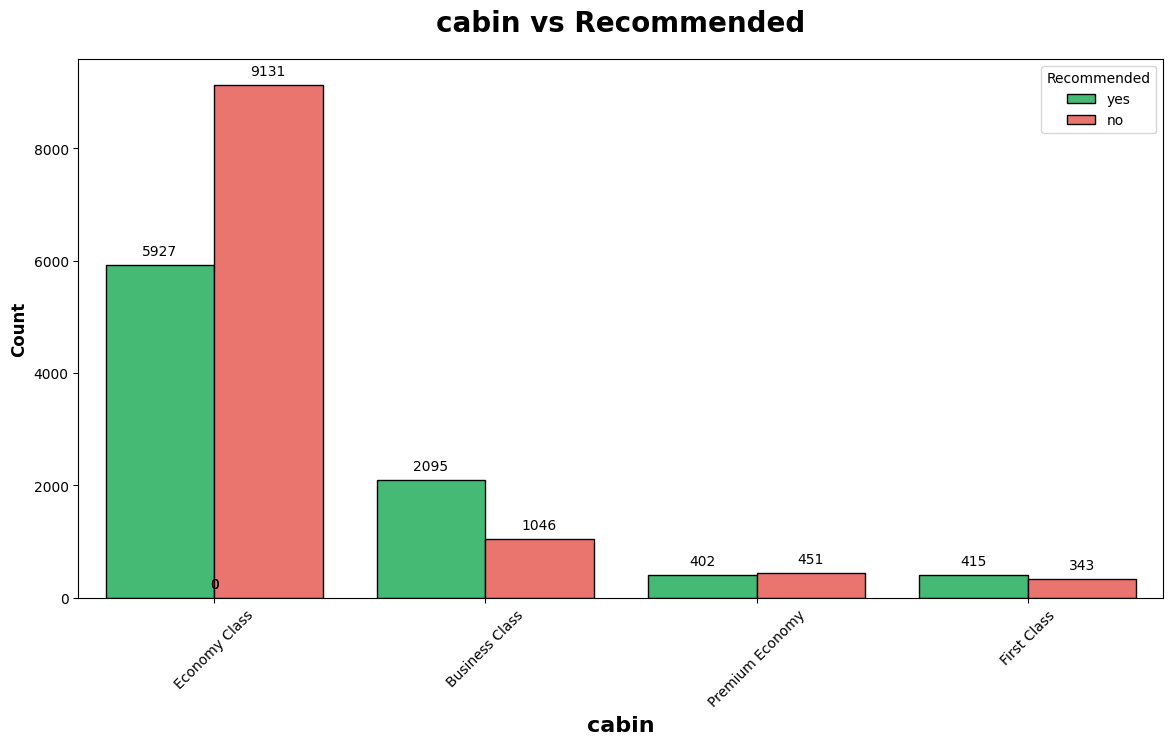

In [204]:
airline_order = df['cabin'].value_counts().index

custom_palette = {'yes': '#32CD72', 'no': '#FF6359'}

plt.subplots(figsize=(14, 7))
ax = sns.countplot(x="cabin", hue="recommended", data=df, ec="black", palette=custom_palette, order=airline_order)


plt.title("cabin vs Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("cabin", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)


for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, '.0f'),
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

Does cabin has impact on recommended

In [205]:
df.groupby('cabin')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
cabin           recommended            
Business Class  yes           66.698504
                no            33.301496
Economy Class   no            60.638863
                yes           39.361137
First Class     yes           54.749340
                no            45.250660
Premium Economy no            52.872216
                yes           47.127784

Does seat_comfort has impact on recommended

In [206]:
df.groupby('seat_comfort')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
seat_comfort recommended            
1.000000     no            96.520963
             yes            3.479037
2.000000     no            86.614173
             yes           13.385827
2.975201     no            79.035088
             yes           20.964912
3.000000     no            60.752401
             yes           39.247599
4.000000     yes           79.107551
             no            20.892449
5.000000     yes           92.884446
             no             7.115554

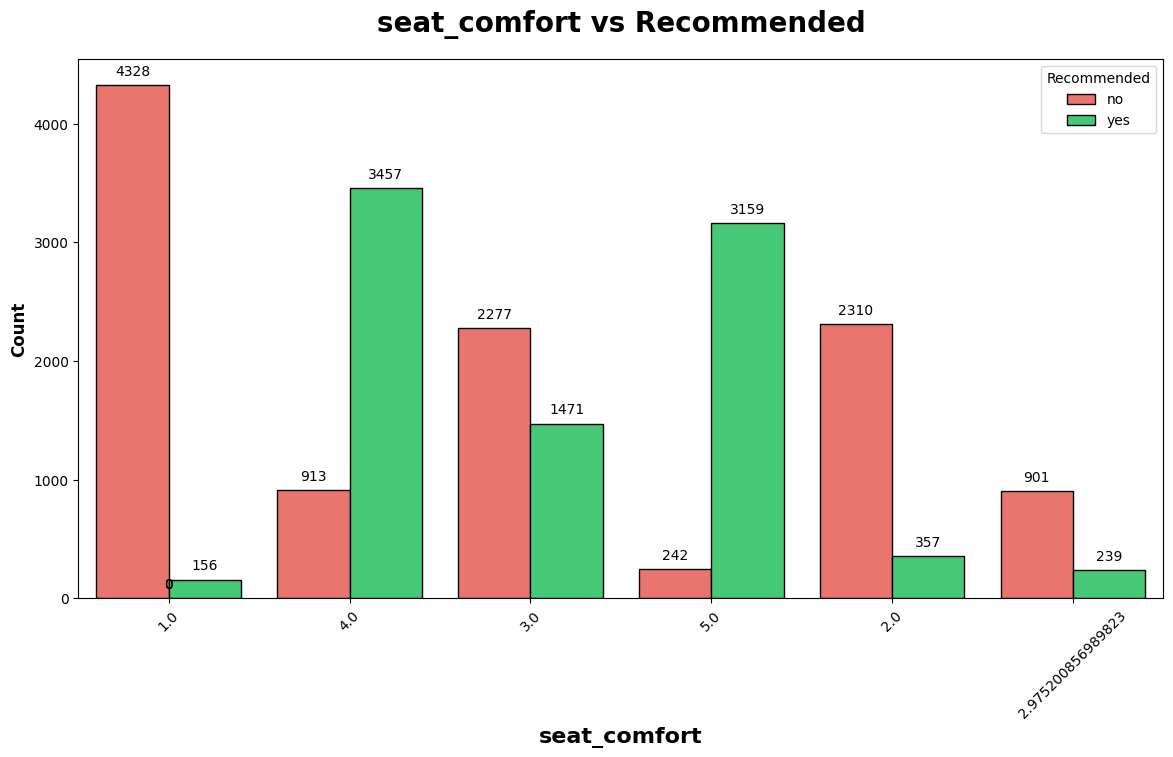

In [207]:
airline_order = df['seat_comfort'].value_counts().index

custom_palette = {'yes': '#32DD72', 'no': '#FF6359'}

plt.subplots(figsize=(14, 7))
ax = sns.countplot(x="seat_comfort", hue="recommended", data=df, ec="black", palette=custom_palette, order=airline_order)

plt.title("seat_comfort vs Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("seat_comfort", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)


for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, '.0f'),
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.xticks(rotation=45)
plt.show()

Does cabin_service has impact on recommended

In [208]:
df.groupby('cabin_service')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
cabin_service recommended            
1.000000      no            97.737557
              yes            2.262443
2.000000      no            89.107143
              yes           10.892857
3.000000      no            72.150971
              yes           27.849029
3.166738      no            79.055258
              yes           20.944742
4.000000      yes           67.339397
              no            32.660603
5.000000      yes           92.194245
              no             7.805755

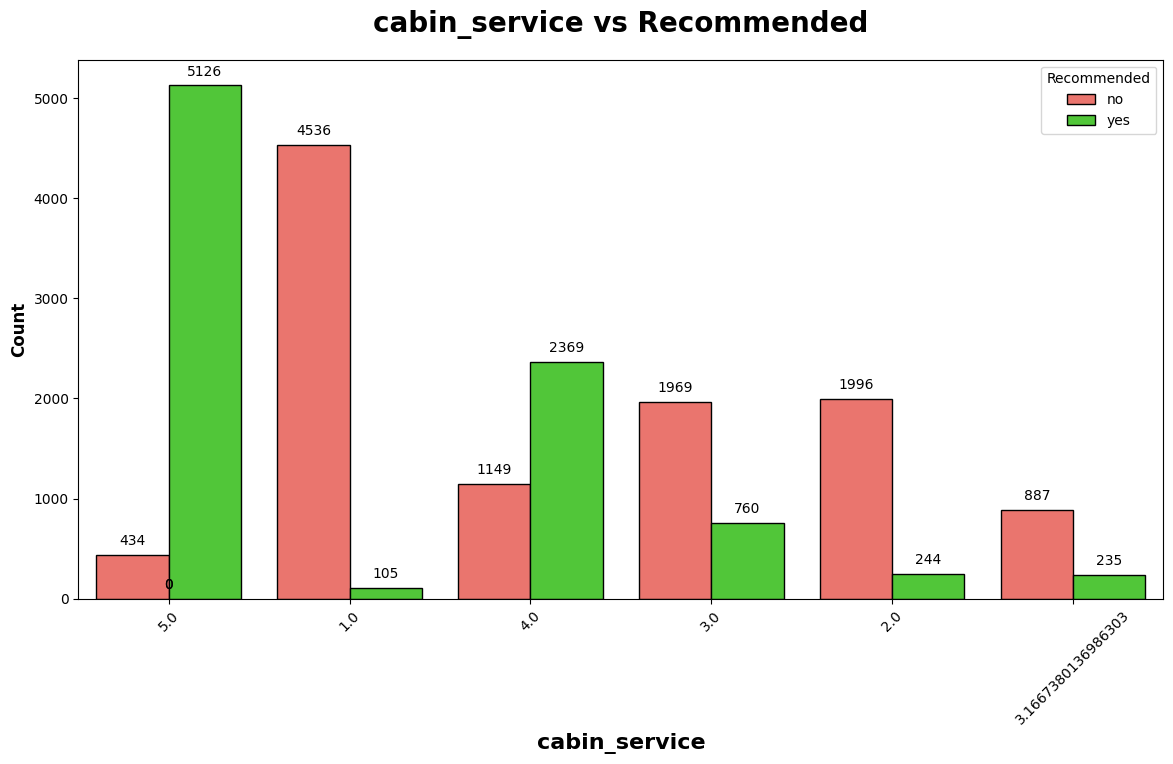

In [209]:
airline_order = df['cabin_service'].value_counts().index


custom_palette = {'yes': '#42DD22', 'no': '#FF6359'}

plt.subplots(figsize=(14, 7))
ax = sns.countplot(x="cabin_service", hue="recommended", data=df, ec="black", palette=custom_palette, order=airline_order)


plt.title("cabin_service vs Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("cabin_service", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)


for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, '.0f'),
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

Does food_bev has impact on recommended

In [210]:
df.groupby('food_bev')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
food_bev recommended            
1.000000 no            94.749125
         yes            5.250875
2.000000 no            80.102916
         yes           19.897084
2.972088 no            83.143878
         yes           16.856122
3.000000 no            51.962025
         yes           48.037975
4.000000 yes           81.658508
         no            18.341492
5.000000 yes           94.139615
         no             5.860385

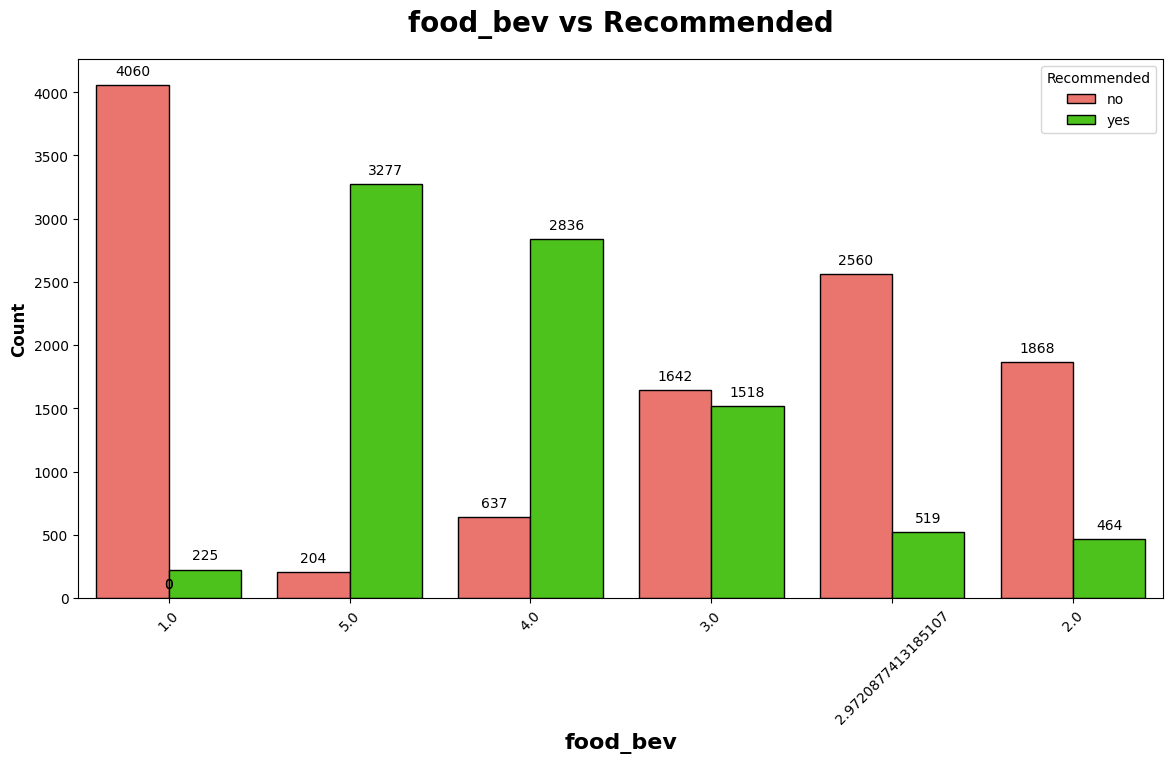

In [211]:
airline_order = df['food_bev'].value_counts().index


custom_palette = {'yes': '#42DD00', 'no': '#FF6359'}

plt.subplots(figsize=(14, 7))
ax = sns.countplot(x="food_bev", hue="recommended", data=df, ec="black", palette=custom_palette, order=airline_order)


plt.title("food_bev vs Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("food_bev", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)


for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, '.0f'),
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

Does values_for_money has impact on recommended

In [212]:
df.groupby('value_for_money')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
value_for_money recommended            
1.000000        no            99.146538
                yes            0.853462
2.000000        no            93.122597
                yes            6.877403
2.881561        no            99.119718
                yes            0.880282
3.000000        no            60.341556
                yes           39.658444
4.000000        yes           89.201102
                no            10.798898
5.000000        yes           97.989155
                no             2.010845

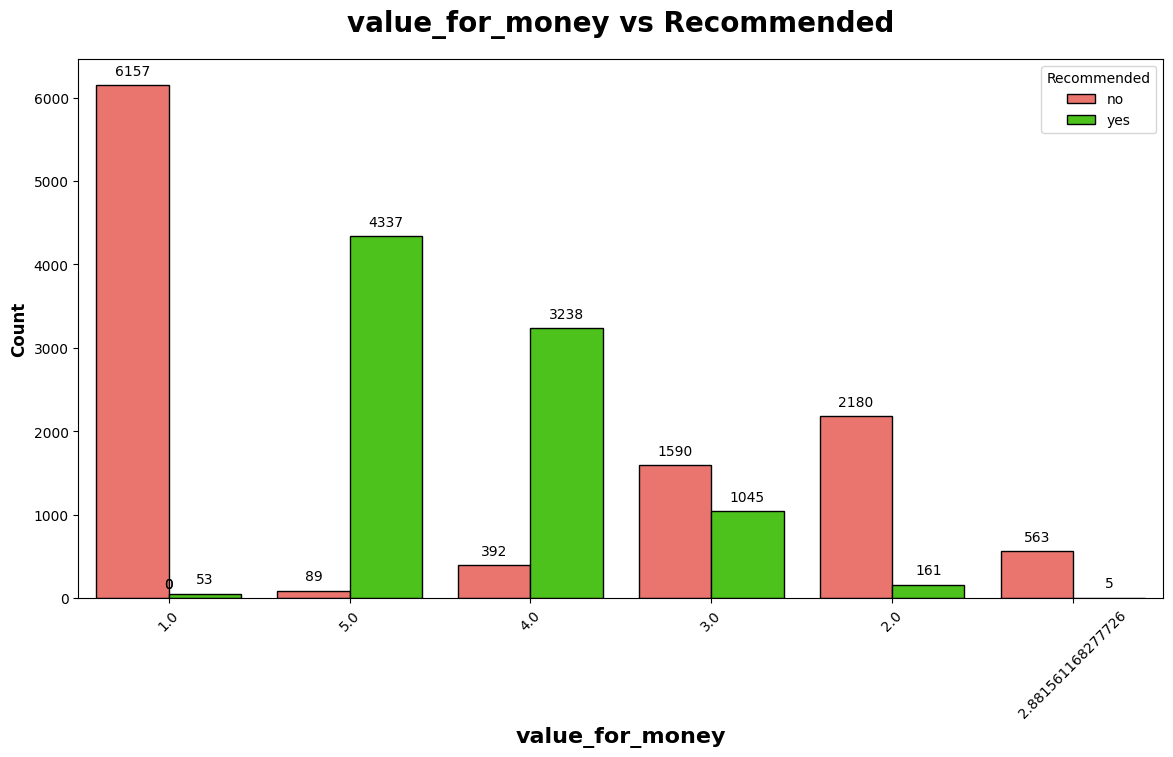

In [213]:
airline_order = df['value_for_money'].value_counts().index


custom_palette = {'yes': '#42DD00', 'no': '#FF6359'}

plt.subplots(figsize=(14, 7))
ax = sns.countplot(x="value_for_money", hue="recommended", data=df, ec="black", palette=custom_palette, order=airline_order)


plt.title("value_for_money vs Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("value_for_money", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)


for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, '.0f'),
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

In [214]:
df.groupby('sentiment_score')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
sentiment_score recommended            
-1.000000       no                 87.5
                yes                12.5
-0.900000       no                100.0
-0.775000       no                100.0
-0.766667       no                100.0
...                                 ...
 0.910000       yes               100.0
 0.938333       yes               100.0
 0.950000       yes               100.0
 0.953333       yes               100.0
 1.000000       yes               100.0

[16589 rows x 1 columns]

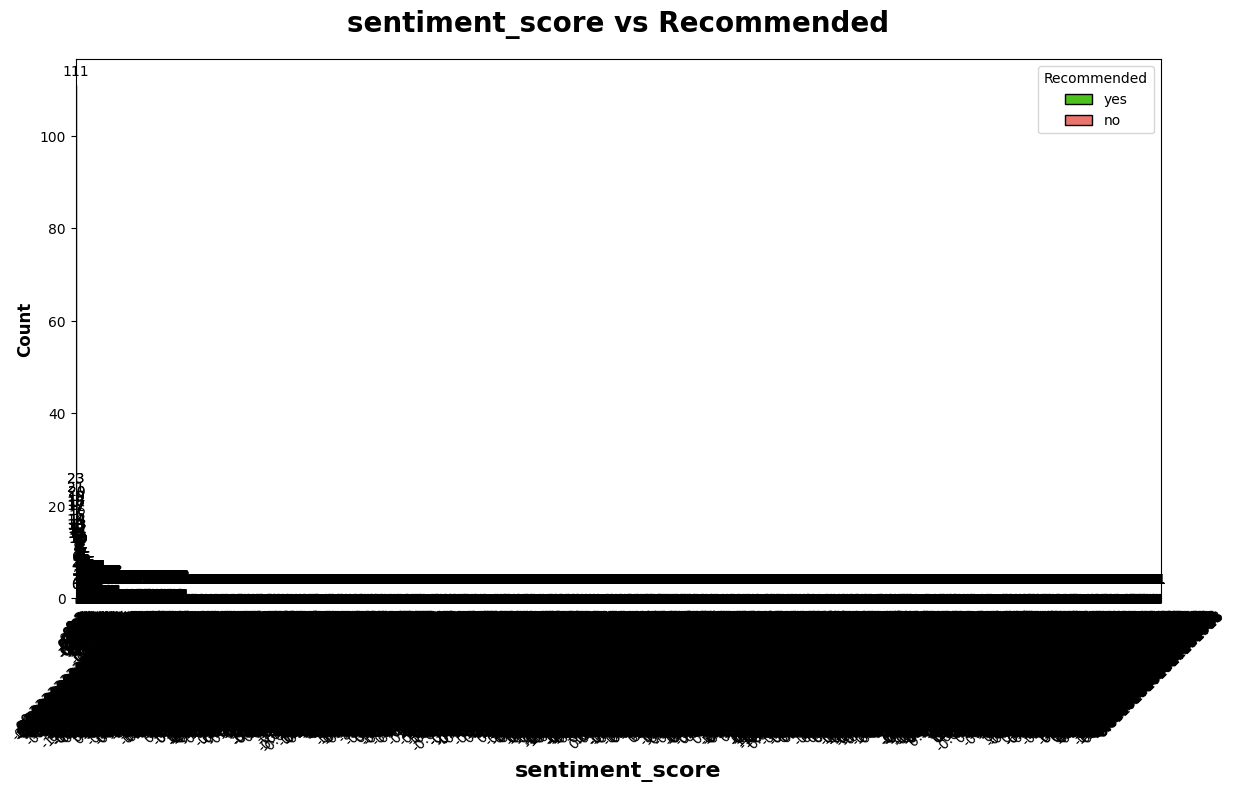

In [215]:
sentiment_score = df['sentiment_score'].value_counts().sort_values(ascending=False).index


custom_palette = {'yes': '#42DD00', 'no': '#FF6359'}

plt.subplots(figsize=(14, 7))
ax = sns.countplot(x="sentiment_score", hue="recommended", data=df, ec="black", palette=custom_palette, order=sentiment_score)


plt.title("sentiment_score vs Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("sentiment_score", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)


for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, '.0f'),
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.show()